In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
np.random.seed(42)
returns = np.random.normal(0, 0.15, 252)  # 252 rendements quotidiens simulés pour une année
confidence_level = 0.95  # Niveau de confiance de 95 %

# VaR : méthode paramétrique

In [30]:
def var_parametric(returns, confidence_level):
    mean_return = np.mean(returns)
    std_dev = np.std(returns)
    z_score = np.percentile(np.random.standard_normal(10000), (1 - confidence_level) * 100)
    var = mean_return + z_score * std_dev
    return abs(var)

parametric_var = var_parametric(returns, confidence_level)*100 # en pourcentage
print(f"VaR Paramétrique à {confidence_level * 100}% : {parametric_var:.4f}", "%")

VaR Paramétrique à 95.0% : 24.0537 %


# VaR : méthode historique

In [31]:
def var_historical(returns, confidence_level):
    sorted_returns = np.sort(returns)
    index = int((1 - confidence_level) * len(sorted_returns))
    var = sorted_returns[index]
    return abs(var)

historical_var = var_historical(returns, confidence_level)*100
print(f"VaR Historique à {confidence_level * 100}% : {historical_var:.4f}", "%")

VaR Historique à 95.0% : 22.7227 %


# Méthode de Simulation de Monte Carlo

In [32]:
def var_monte_carlo(returns, confidence_level, simulations=10000):
    mean_return = np.mean(returns)
    std_dev = np.std(returns)
    simulated_returns = np.random.normal(mean_return, std_dev, simulations)
    var = var_historical(simulated_returns, confidence_level)
    return var

monte_carlo_var = var_monte_carlo(returns, confidence_level)*100
print(f"VaR Monte Carlo à {confidence_level * 100}% : {monte_carlo_var:.4f}", "%")

VaR Monte Carlo à 95.0% : 23.4137 %


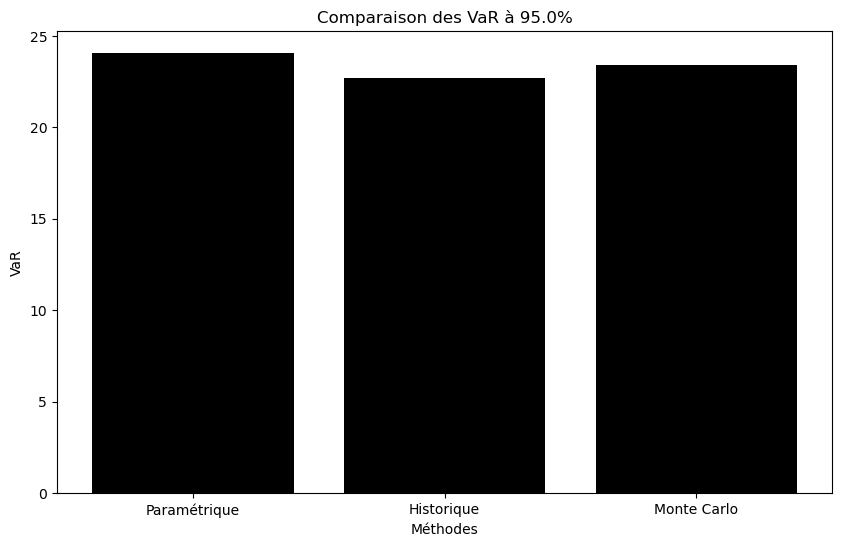

In [33]:
# Visualisation

methods = ['Paramétrique', 'Historique', 'Monte Carlo']
vars = [parametric_var, historical_var, monte_carlo_var]

plt.figure(figsize=(10, 6))
plt.bar(methods, vars, color='black')
plt.title(f"Comparaison des VaR à {confidence_level * 100}%")
plt.xlabel("Méthodes")
plt.ylabel("VaR")
plt.show()